In [4]:
%matplotlib inline
%run ../../import_envs.py
%run ../hmc_hyperparams.py

CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')

probtorch: 0.0+5a2c637 torch: 1.3.0


In [2]:
# load test data
# test_sets = ['pts_20', 'pts_40', 'pts_60', 'pts_80', 'pts_100']
test_sets = ['pts_100']

DATAs = []
for s in test_sets:
    data = torch.from_numpy(np.load(DATA_DIR + 'gmm/test/' + s + '/' + 'ob.npy')).float() ## load testing datasets
    DATAs.append(data)
## load the weights
# from apg_modeling_neural import init_model
from baseline_modeling import init_model

model = init_model(architecture='mlp',
                      model_params=model_params, 
                      CUDA=CUDA, 
                      DEVICE=DEVICE, 
                      LOAD_VERSION='apg-new-systematic-9sweeps-5samples',
                      LR=None)

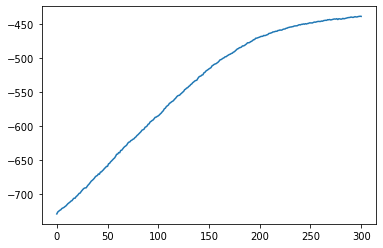

In [5]:
import numpy as np
test = np.load('log_joint_hmc_hmc1x_0.npy').mean(1)
import matplotlib.pyplot as plt
plt.plot(test)

#### HMC updates after one-shot 

In [10]:
## visualize samples
%run ../hmc_testing.py
from viz import viz_samples

APG_SWEEPS_TEST = 0
DATA_PTR = 4
SAVE_NAME = 'samples-%d' % DATA_PTR

datas = sample_data_uniform(DATAs=DATAs, 
                            data_ptr=DATA_PTR)


SAMPLE_SIZE_TEST = 1000

metrics = test_single_hmc(model=model, 
                          datas=datas, 
                          sample_size=SAMPLE_SIZE_TEST, 
                          hmc_num_steps=12, 
                          leapfrog_step_size=1e-3, 
                          leapfrog_num_steps=100,
                          CUDA=CUDA, 
                          DEVICE=DEVICE)


# viz_samples(datas=datas,
#             metrics=metrics,
#             apg_sweeps=APG_SWEEPS_TEST,
#             K=K, 
#             viz_interval=1, 
#             figure_size=5, 
#             title_fontsize=20, 
#             marker_size=5.0, 
#             opacity=0.3, 
#             bound=15, 
#             colors=['#AA3377', '#EE7733', '#009988', '#0077BB', '#BBBBBB', '#EE3377', '#DDCC77'],
#             save_name=None)

hmc-step=1
hmc-step=2
hmc-step=3
hmc-step=4
hmc-step=5
hmc-step=6
hmc-step=7
hmc-step=8
hmc-step=9
hmc-step=10
hmc-step=11
hmc-step=12


In [12]:
log_joint = metrics[0]['density'].cpu()
# np.save('log_joint_hmc', log_joint.squeeze(-1).data.numpy())

In [13]:
log_joint.mean(1)

tensor([[-1191.5570],
        [ -871.2000],
        [ -851.5919],
        [ -843.1304],
        [ -838.9656],
        [ -835.7849],
        [ -833.4294],
        [ -831.2433],
        [ -829.5875],
        [ -827.8098],
        [ -826.4559],
        [ -824.9517],
        [ -823.5536]])